# NOSE QUE VERGA ES ESTO

In [40]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_cuartos = gpd.read_file('data/geodata_historicos/df_cuartos.shp')
df_hoteles = gpd.read_file('data/geodata_historicos/df_hoteles.shp')
df_servicios = gpd.read_file('data/geodata_historicos/df_servicios.shp')

sacar moda por region de lo mas frecuente de los hotels y hay otra cosa

In [11]:
df_cuartos

,municipio,total,5 estrella,4 estrella,3 estrella,2 estrella,1 estrella,sin catego,año,region,geometry
0,bolanos,28,0,0,0,0,8,20,2013,norte,POINT (630487.489 2418741.766)
1,chimaltitan,8,0,0,0,0,0,8,2013,norte,POINT (641908.744 2419381.145)
2,colotlan,138,0,62,0,0,76,0,2013,norte,POINT (687716.027 2439943.440)
3,huejucar,41,0,0,0,0,41,0,2013,norte,POINT (669897.399 2472169.574)
4,huejuquilla el alto,77,0,0,60,0,0,17,2013,norte,POINT (614103.465 2507056.790)
...,...,...,...,...,...,...,...,...,...,...,...
920,zapotiltic,54,0,18,0,0,0,36,2020,sur,POINT (662105.811 2174922.065)
921,zapotitlan de vadillo,20,0,0,0,0,0,20,2020,sur,POINT (644854.143 2159952.380)
922,zapotlan del rey,28,13,0,15,0,0,0,2020,cienega,POINT (717327.662 2268047.274)
923,zapotlan el grande,537,0,137,239,60,101,0,2020,sur,POINT (659167.484 2179755.055)


In [12]:
df_hoteles

,municipio,total,5 estrella,4 estrella,3 estrella,2 estrella,1 estrella,sin catego,año,region,geometry
0,bolanos,3,0,0,0,0,1,2,2013,norte,POINT (612211.428 2395738.544)
1,chimaltitan,1,0,0,0,0,0,1,2013,norte,POINT (651852.104 2408890.109)
2,colotlan,2,0,1,0,0,1,0,2013,norte,POINT (692610.712 2439235.534)
3,huejucar,4,0,0,0,0,4,0,2013,norte,POINT (682714.170 2472578.468)
4,huejuquilla el alto,4,0,0,2,0,0,2,2013,norte,POINT (614467.136 2484608.942)
...,...,...,...,...,...,...,...,...,...,...,...
913,zapotiltic,3,0,1,0,0,0,2,2020,sur,POINT (675549.899 2176397.213)
914,zapotitlan de vadillo,1,0,0,0,0,0,1,2020,sur,POINT (640295.685 2153624.403)
915,zapotlan del rey,2,1,0,1,0,0,0,2020,cienega,POINT (725128.854 2270429.228)
916,zapotlan el grande,15,0,2,7,3,3,0,2020,sur,POINT (660388.834 2177295.060)


In [13]:
df_servicios[[x for x in df_servicios.columns if x not in ['municipio', 'geometry', 'año', 'region']]] = df_servicios[[x for x in df_servicios.columns if x not in ['municipio', 'geometry', 'año', 'region']]].astype('int64')

In [14]:
pivot = pd.pivot_table(df_servicios, 'Agencias d', ['region', 'municipio', 'año'])

In [15]:
df_servicios['region'].unique()

array(['norte', None, 'altos norte', 'altos sur', 'cienega', 'sureste',
       'sur', 'sierra de amula', 'costa sur', 'costa norte',
       'sierra occidental', 'valles', 'centro'], dtype=object)

In [17]:
datos = pivot.loc['norte']
# datos

## DATOS POSTPANDEMIA QUE VERGA

In [65]:
df_alojamiento = pd.read_csv('data/post_pandemia/Alojamiento.csv', index_col=['Año', 'Categoria'])
df_cuartos = pd.read_csv('data/post_pandemia/cuartos.csv', index_col='Año')
df_cuartos_crecimiento = pd.read_csv('data/post_pandemia/cuartos_crecimiento.csv', index_col='Año')
df_establecimientos = pd.read_csv('data/post_pandemia/establecimientos.csv', index_col='Año')
df_establecimientos_crecimiento = pd.read_csv('data/post_pandemia/establecimientos_crecimiento.csv', index_col='Año')

### Alojamiento

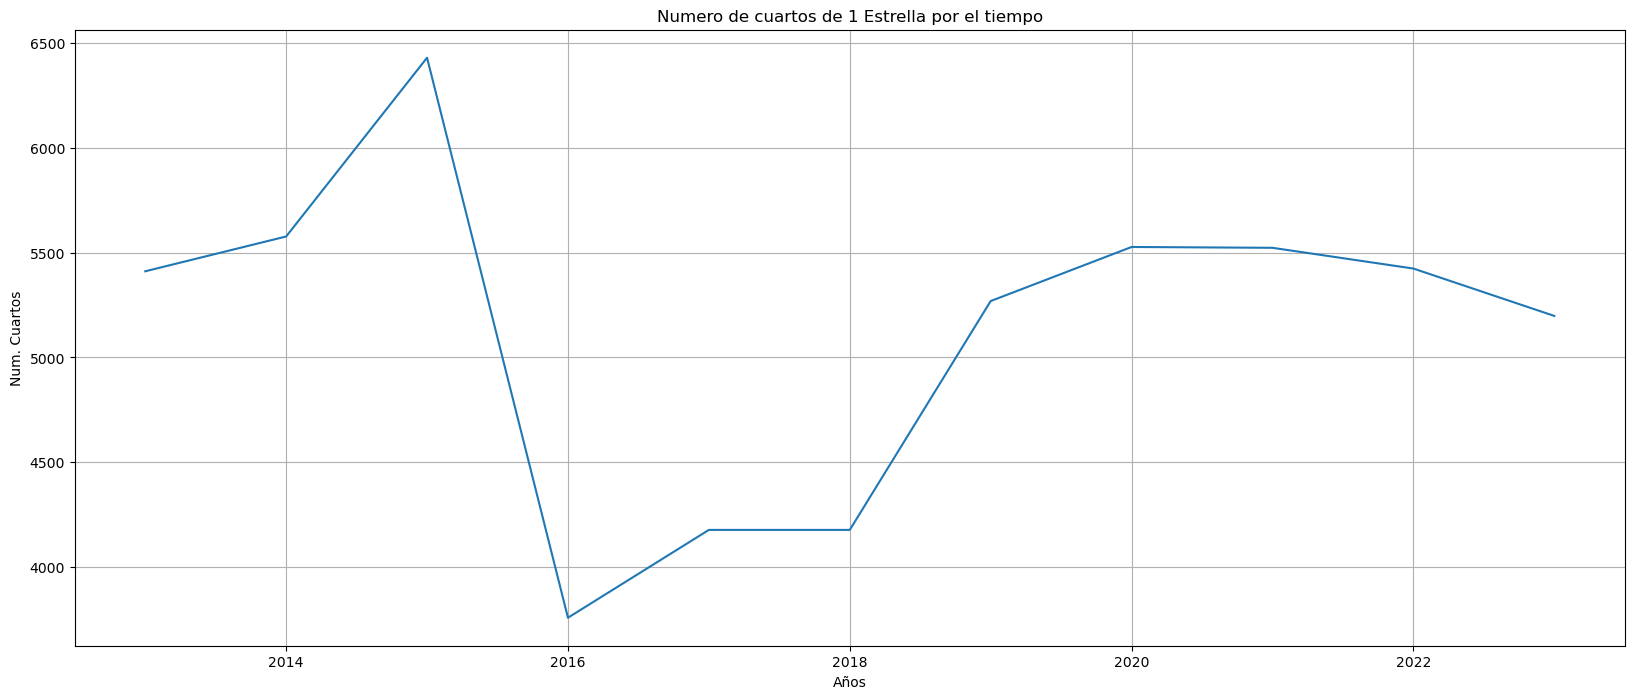

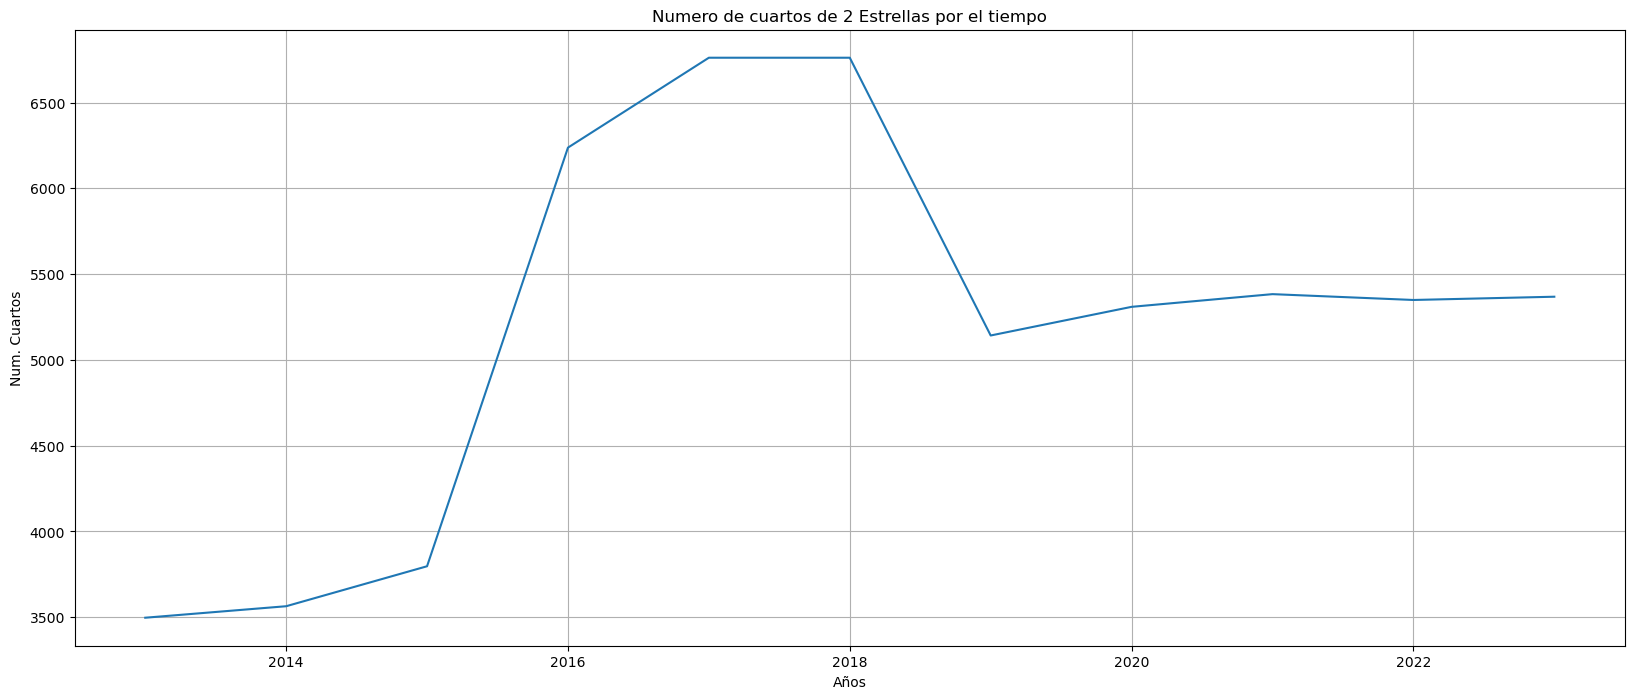

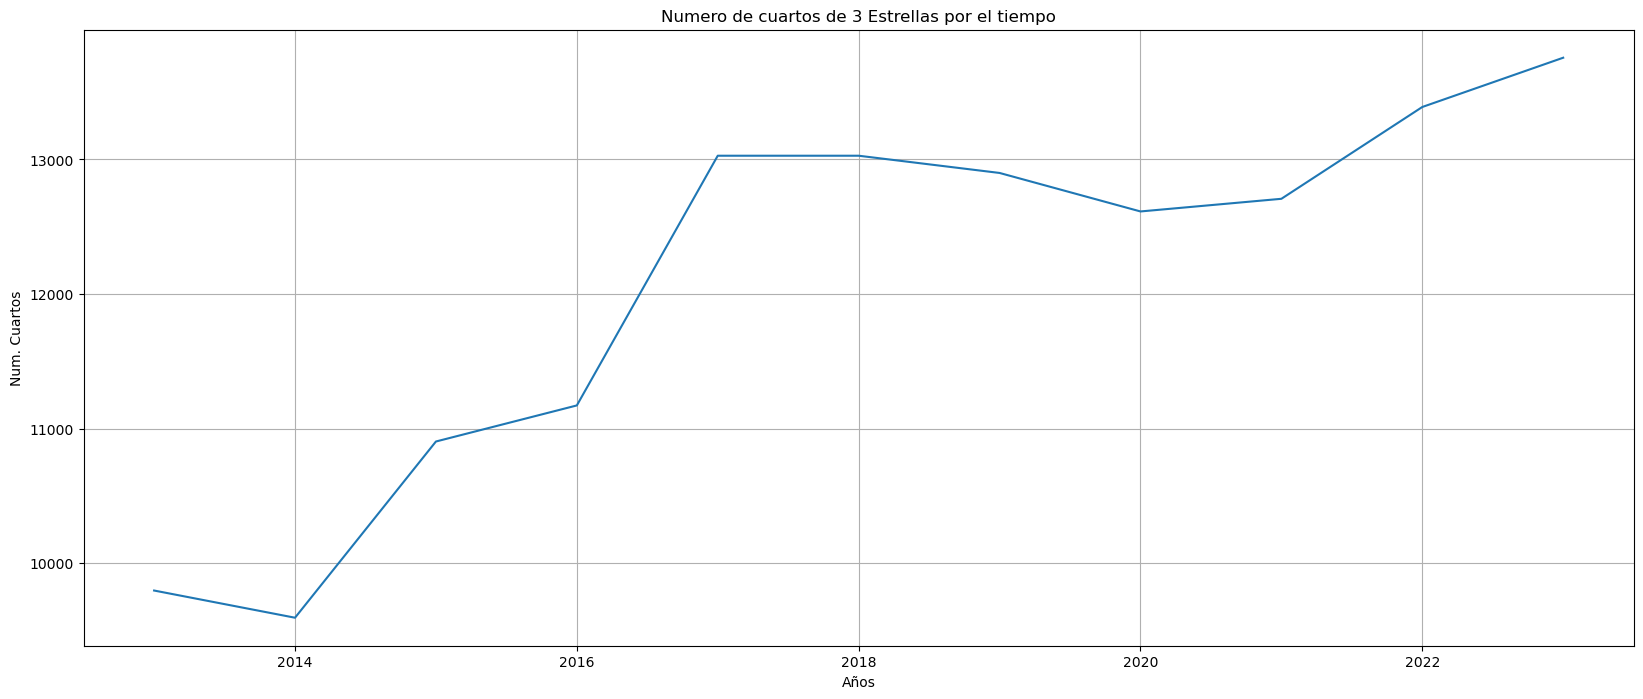

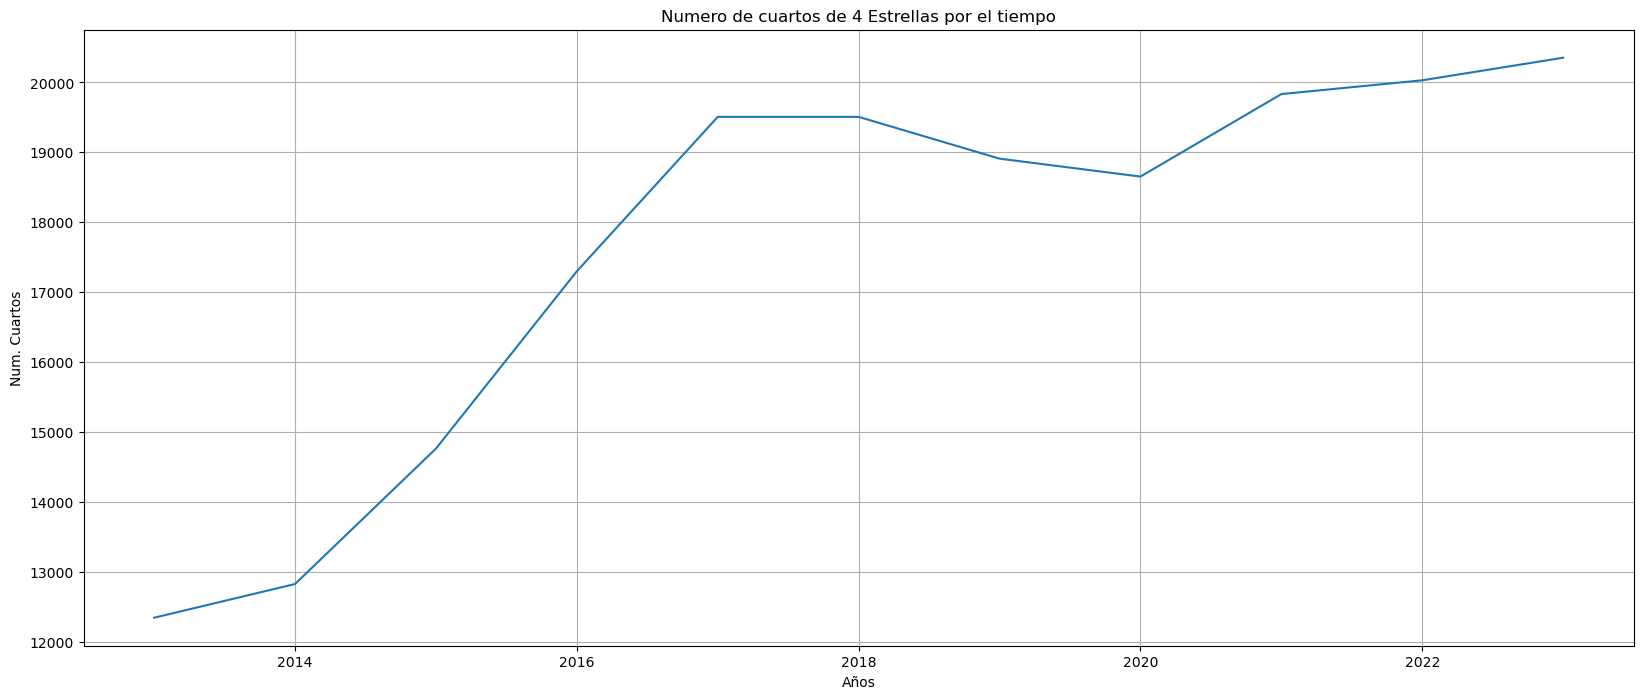

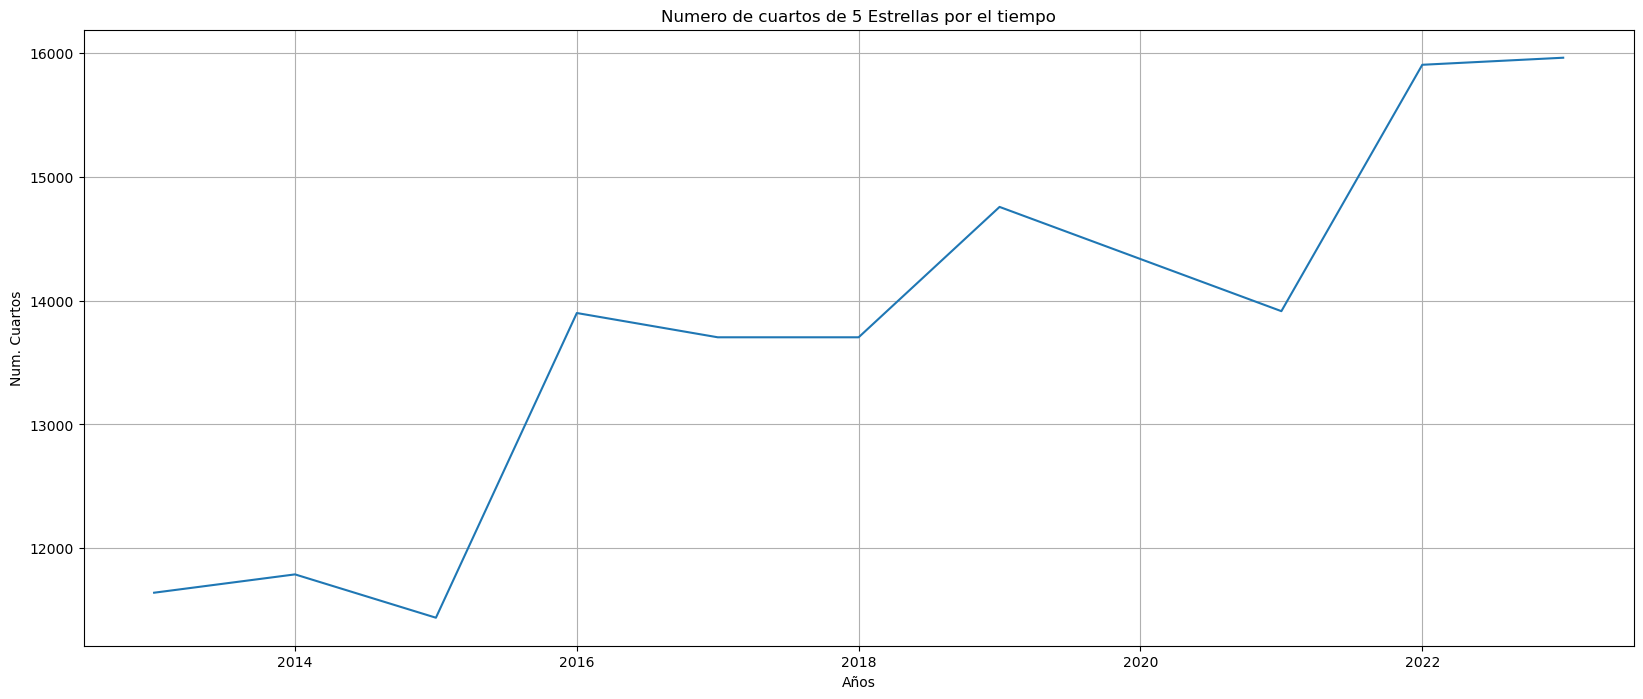

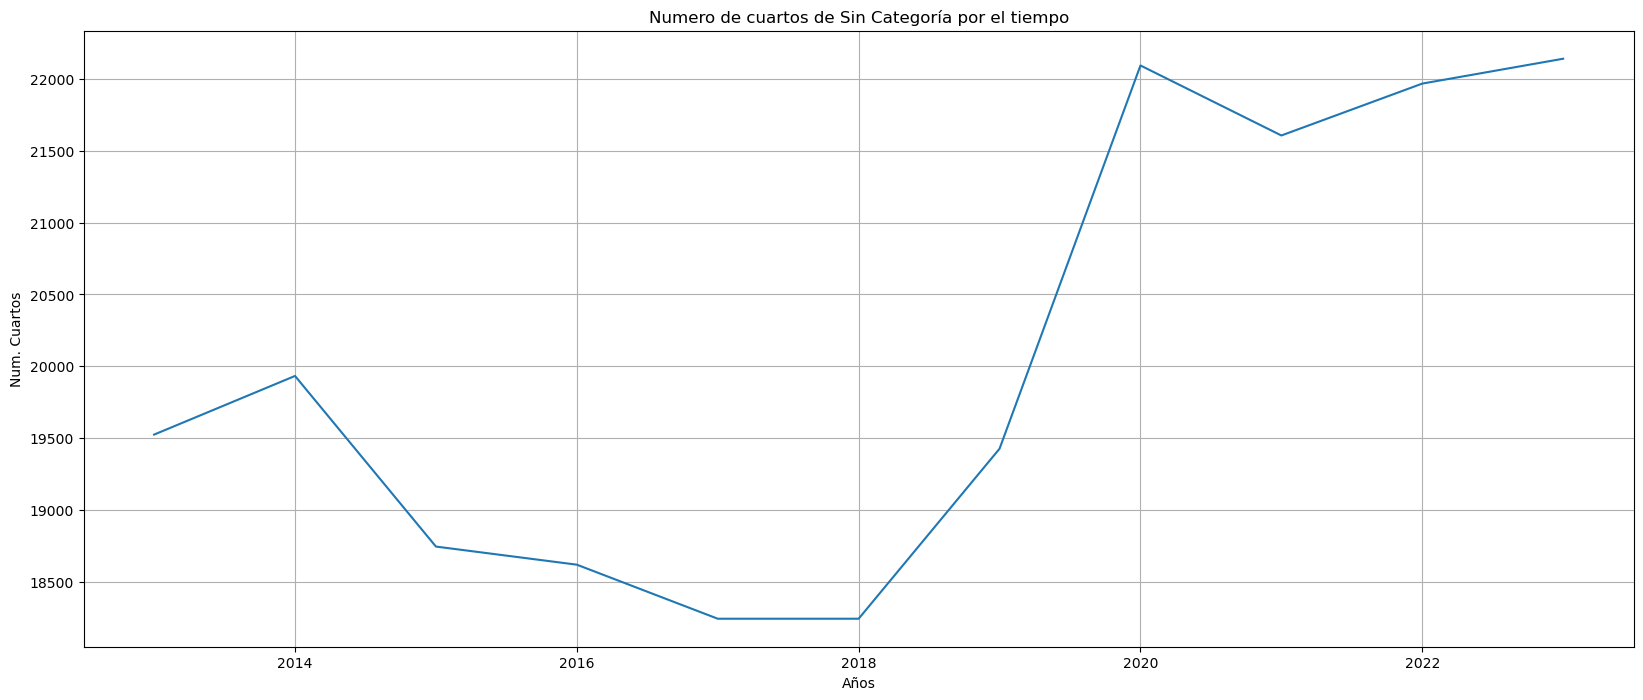

In [83]:
for name in df_alojamiento.columns:
    datos = []

    for i in range(2013, 2024):
        datos.append(df_alojamiento.loc[i, 'Cuartos '][name])

    fig,ax = plt.subplots(1,1,figsize=(20,8))
    sns.lineplot(x=np.arange(2013, 2024), y=datos)
    plt.grid(True)
    ax.set_title(f'Numero de cuartos de {name} por el tiempo')
    ax.set_xlabel('Años')
    ax.set_ylabel('Num. Cuartos')

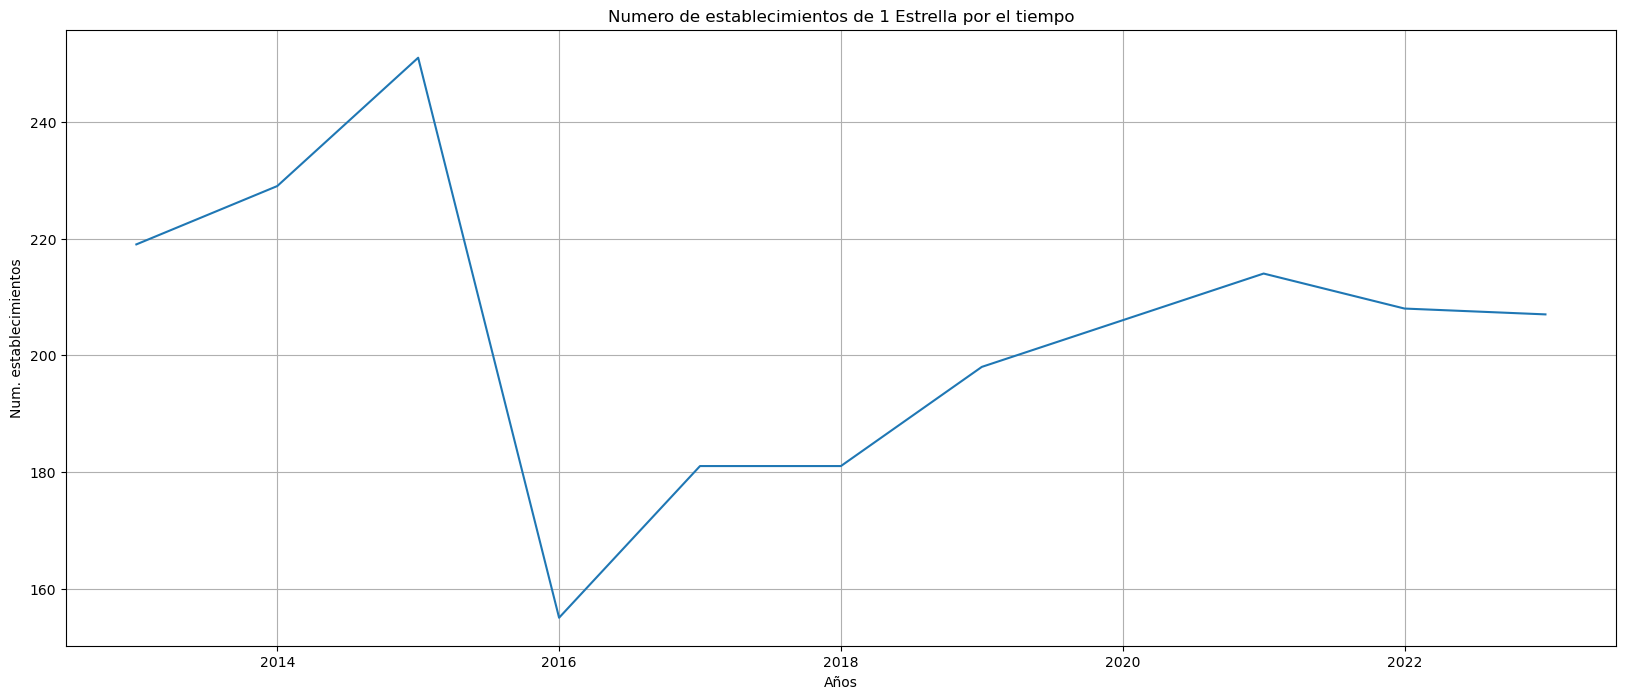

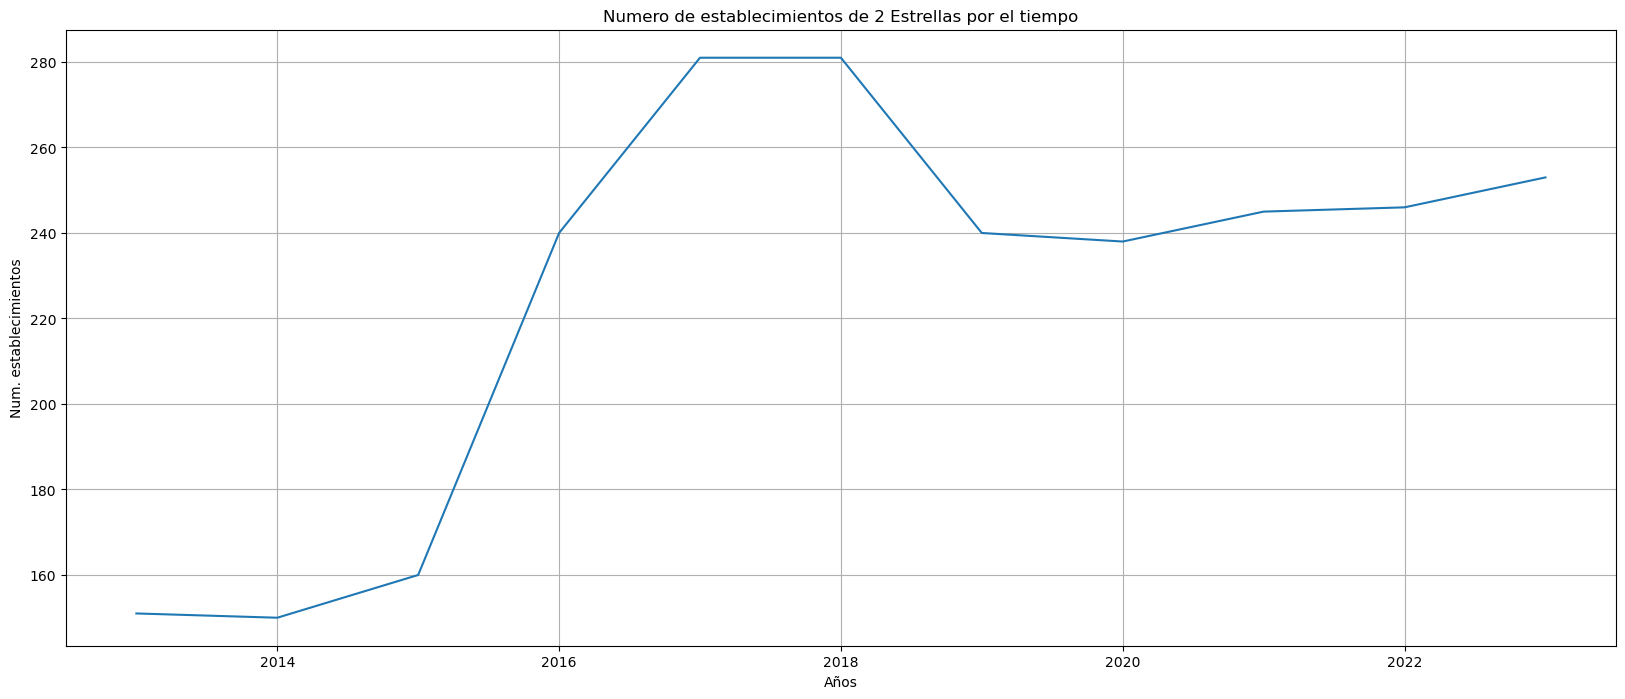

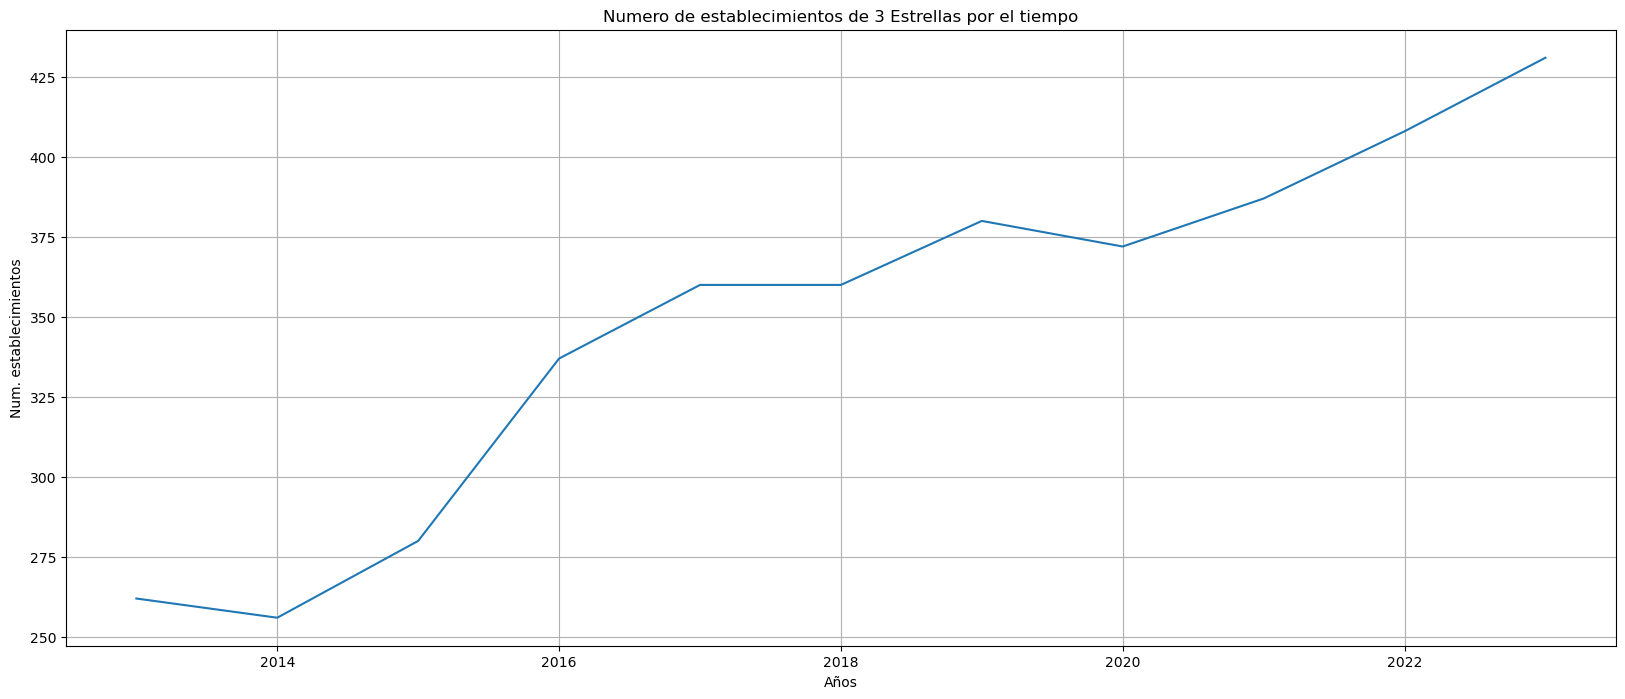

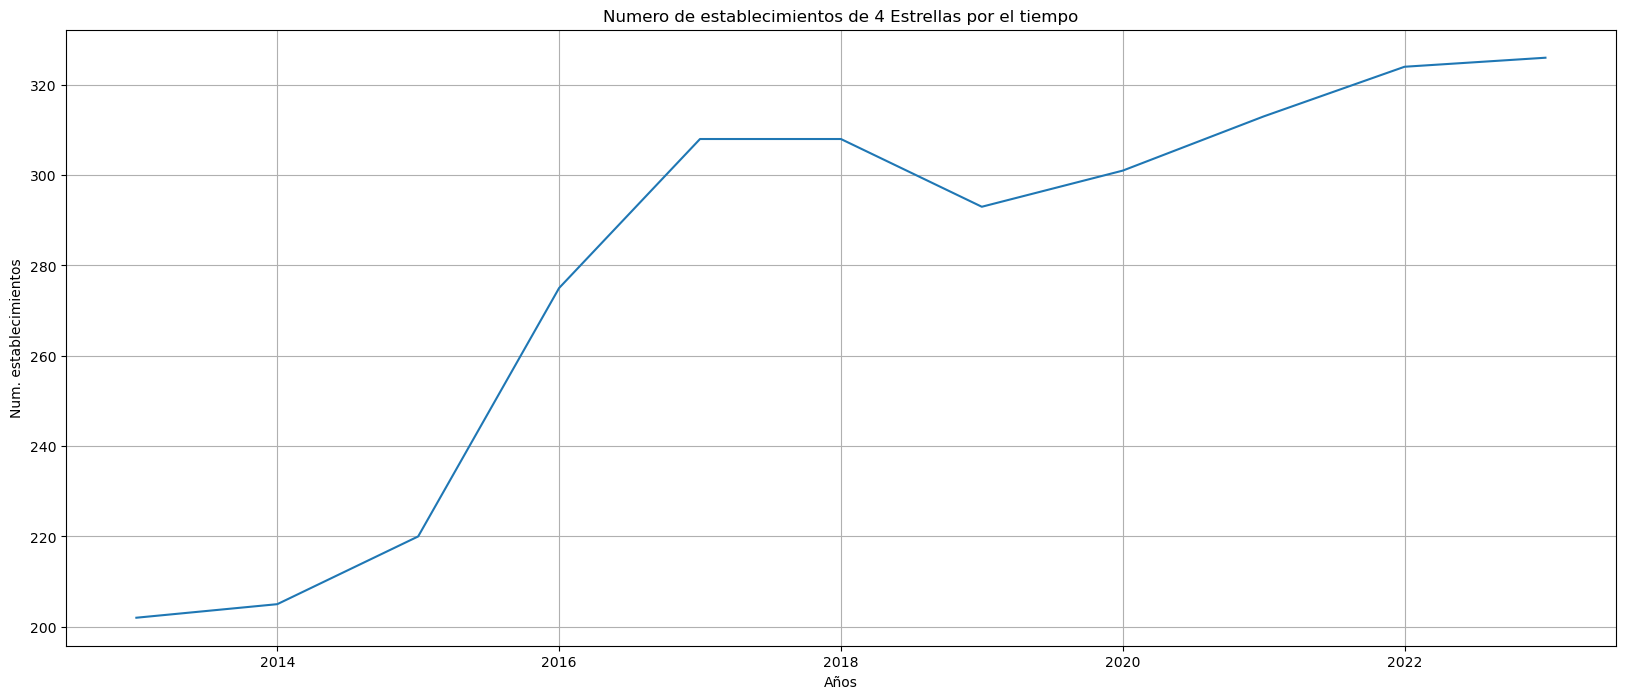

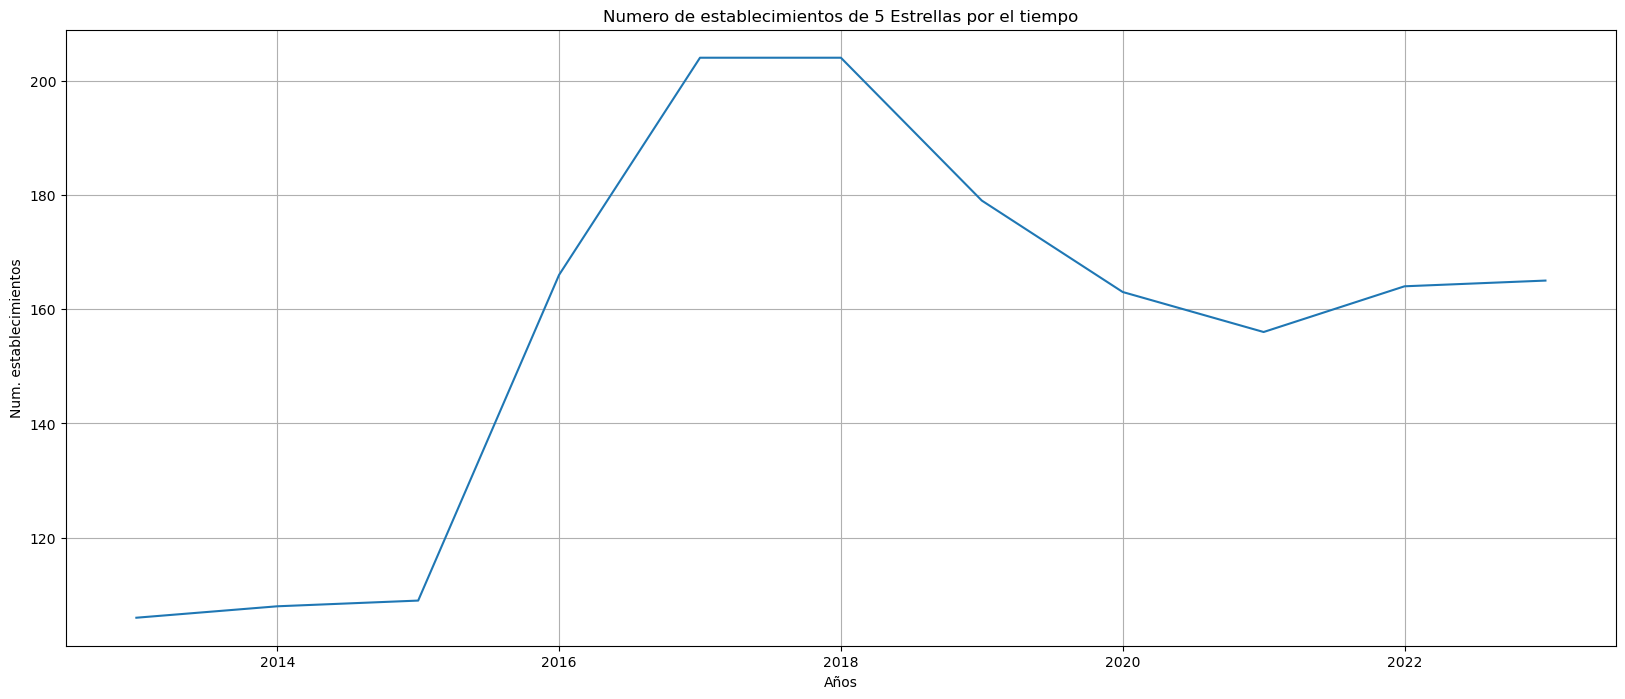

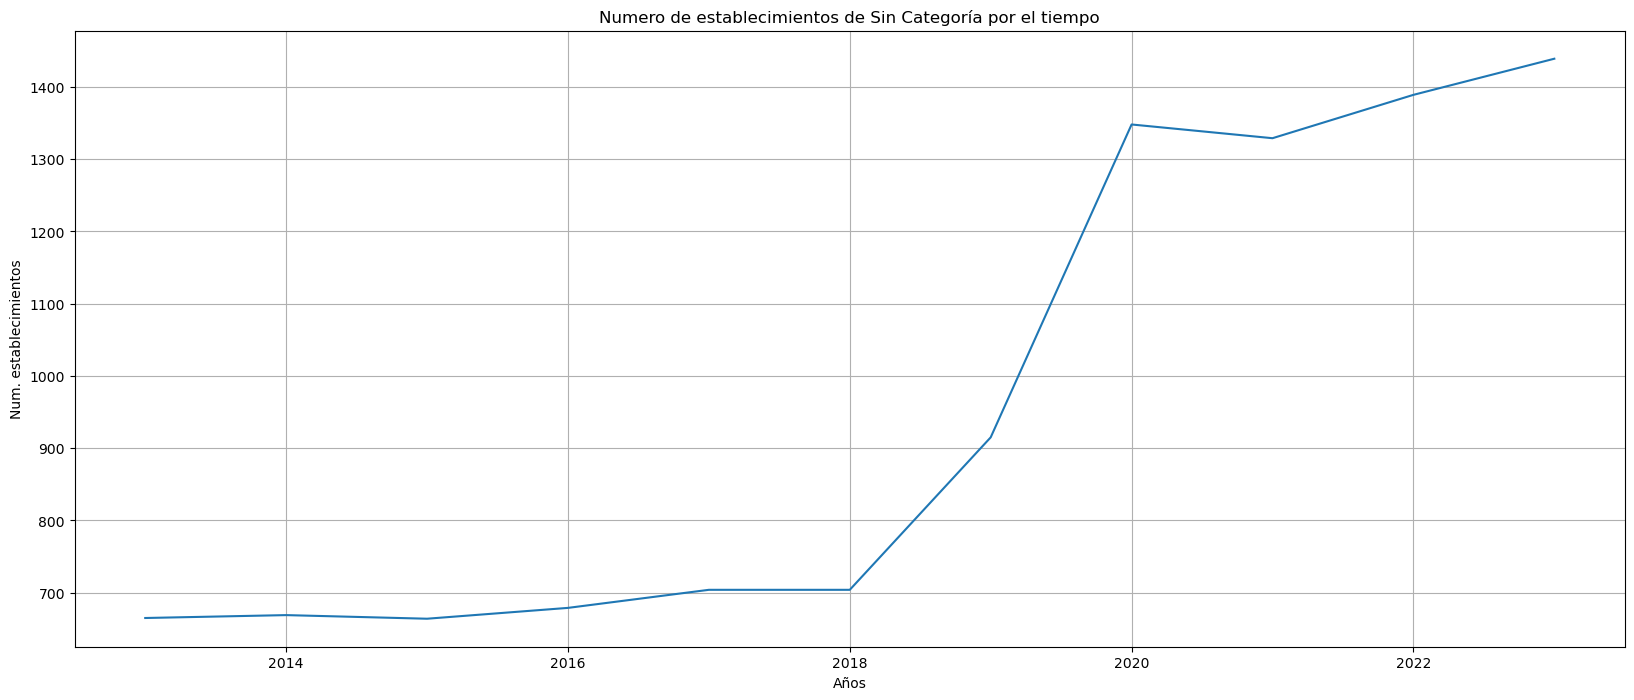

In [87]:
for name in df_alojamiento.columns:
    datos = []

    for i in range(2013, 2024):
        datos.append(df_alojamiento.loc[i, 'Establecimientos '][name])

    fig,ax = plt.subplots(1,1,figsize=(20,8))
    sns.lineplot(x=np.arange(2013, 2024), y=datos)
    plt.grid(True)
    ax.set_title(f'Numero de establecimientos de {name} por el tiempo')
    ax.set_xlabel('Años')
    ax.set_ylabel('Num. establecimientos')

### Cuartos

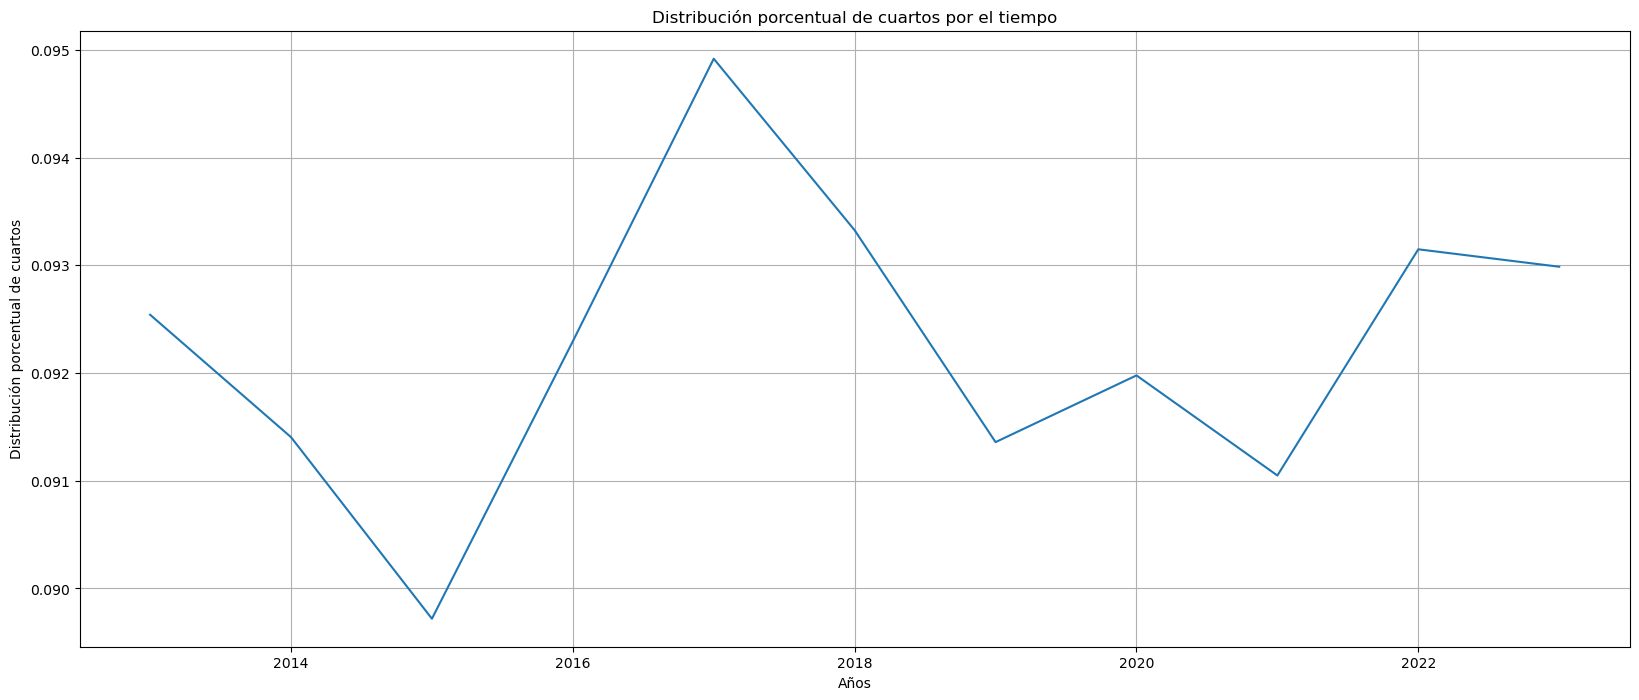

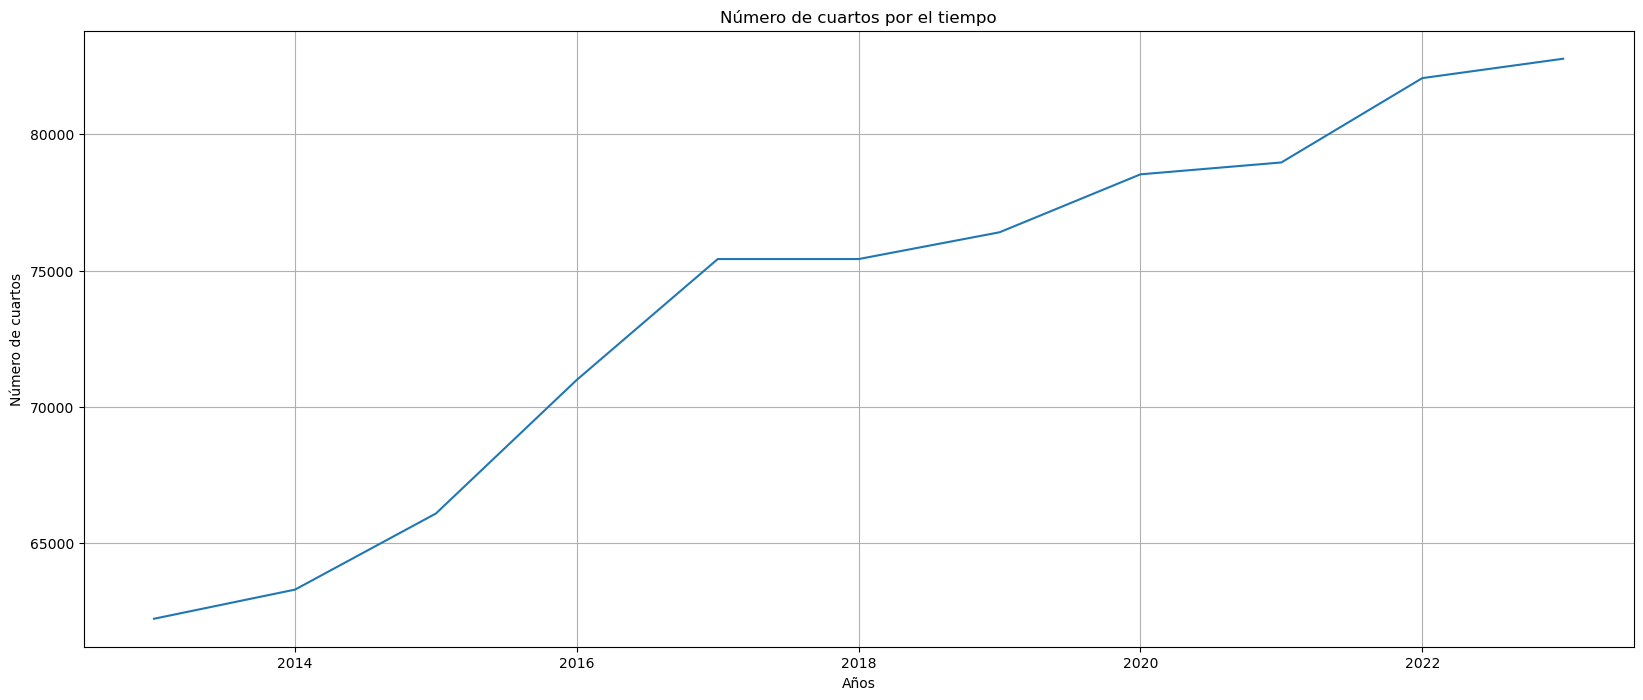

In [90]:
for name in df_cuartos.columns:
    fig,ax = plt.subplots(1,1,figsize=(20,8))

    sns.lineplot(x=df_cuartos.index, y=df_cuartos[name], ax=ax)
    plt.grid(True)
    ax.set_title(f'{name} por el tiempo')
    ax.set_xlabel('Años')
    ax.set_ylabel(f'{name}')

### Cuartos crecimiento

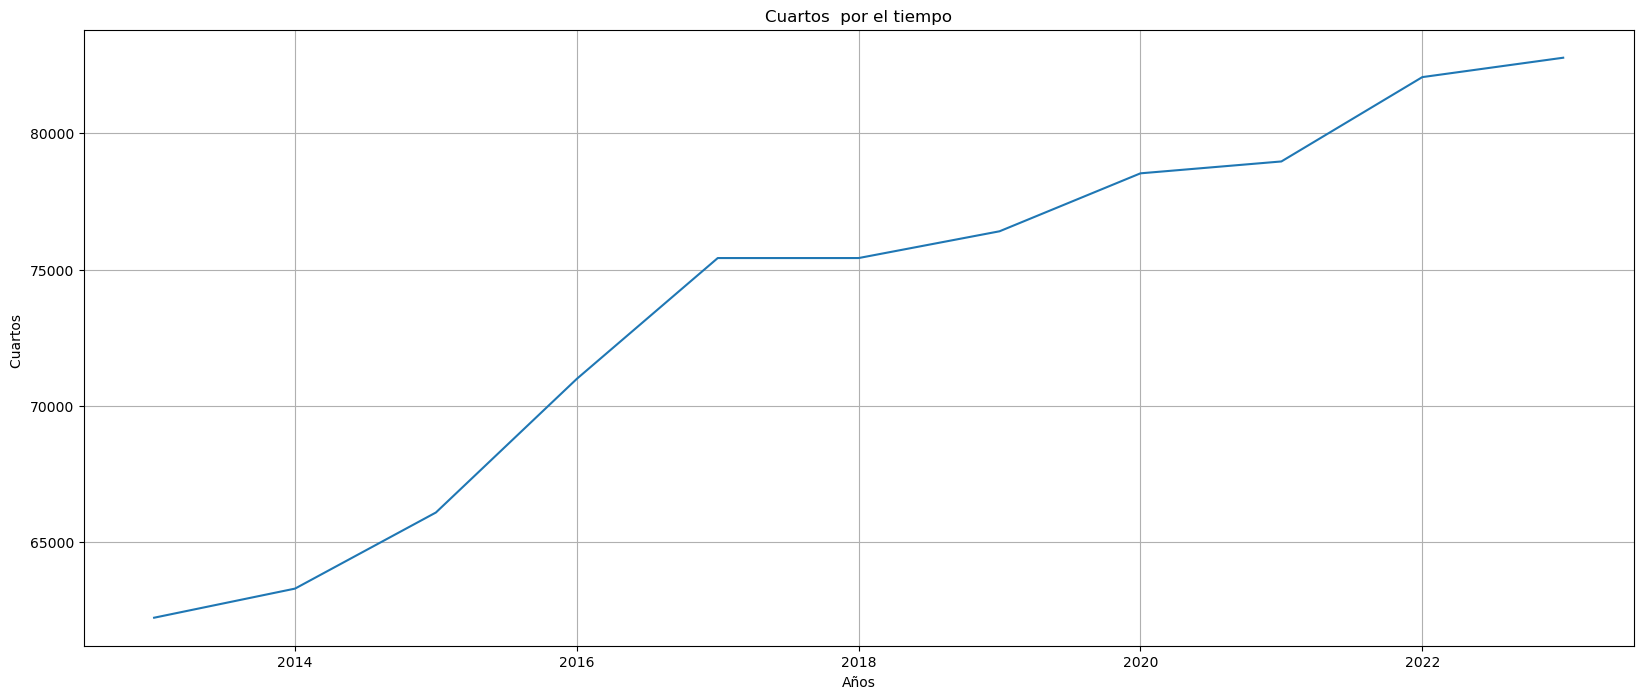

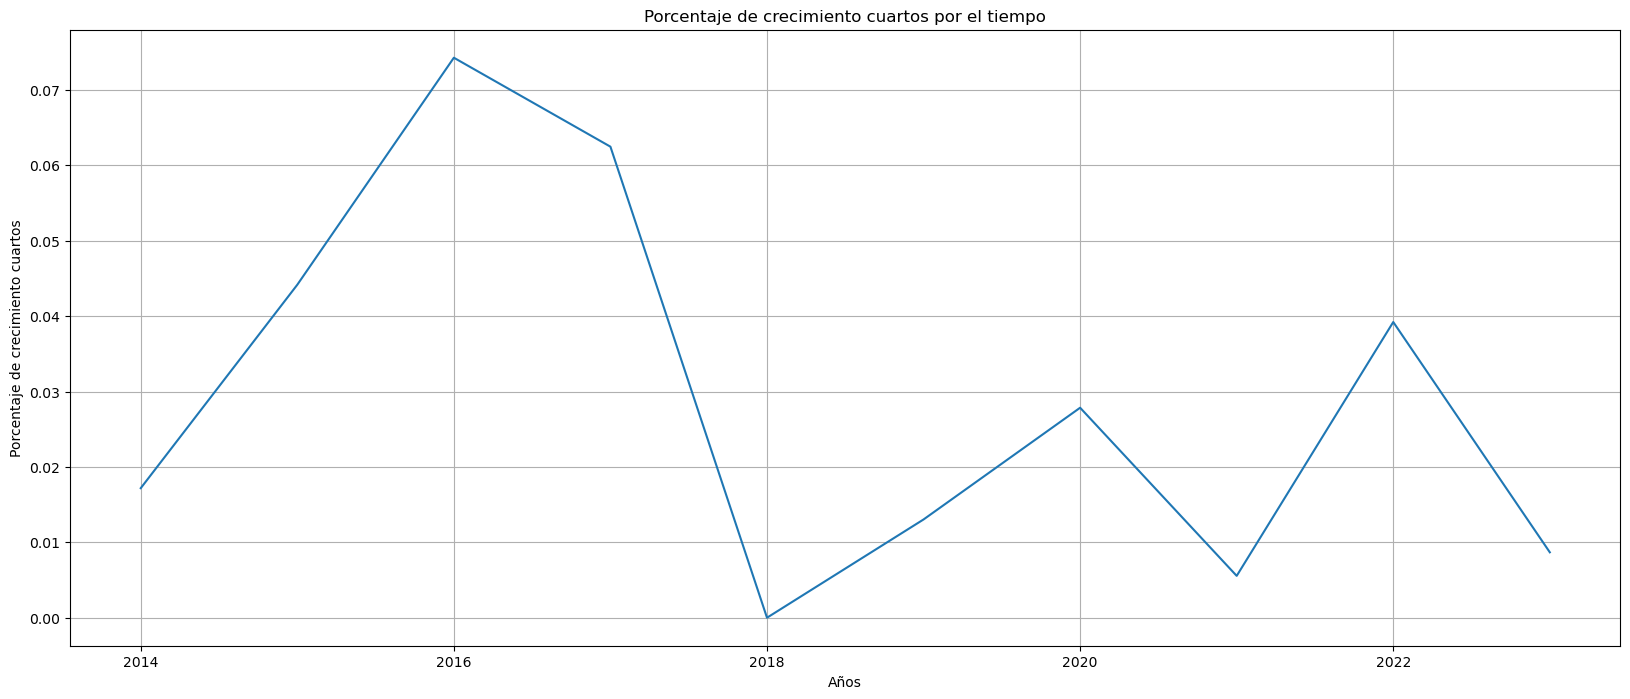

In [91]:
for name in df_cuartos_crecimiento.columns:
    fig,ax = plt.subplots(1,1,figsize=(20,8))

    sns.lineplot(x=df_cuartos_crecimiento.index, y=df_cuartos_crecimiento[name], ax=ax)
    plt.grid(True)
    ax.set_title(f'{name} por el tiempo')
    ax.set_xlabel('Años')
    ax.set_ylabel(f'{name}')

### estableciminetos

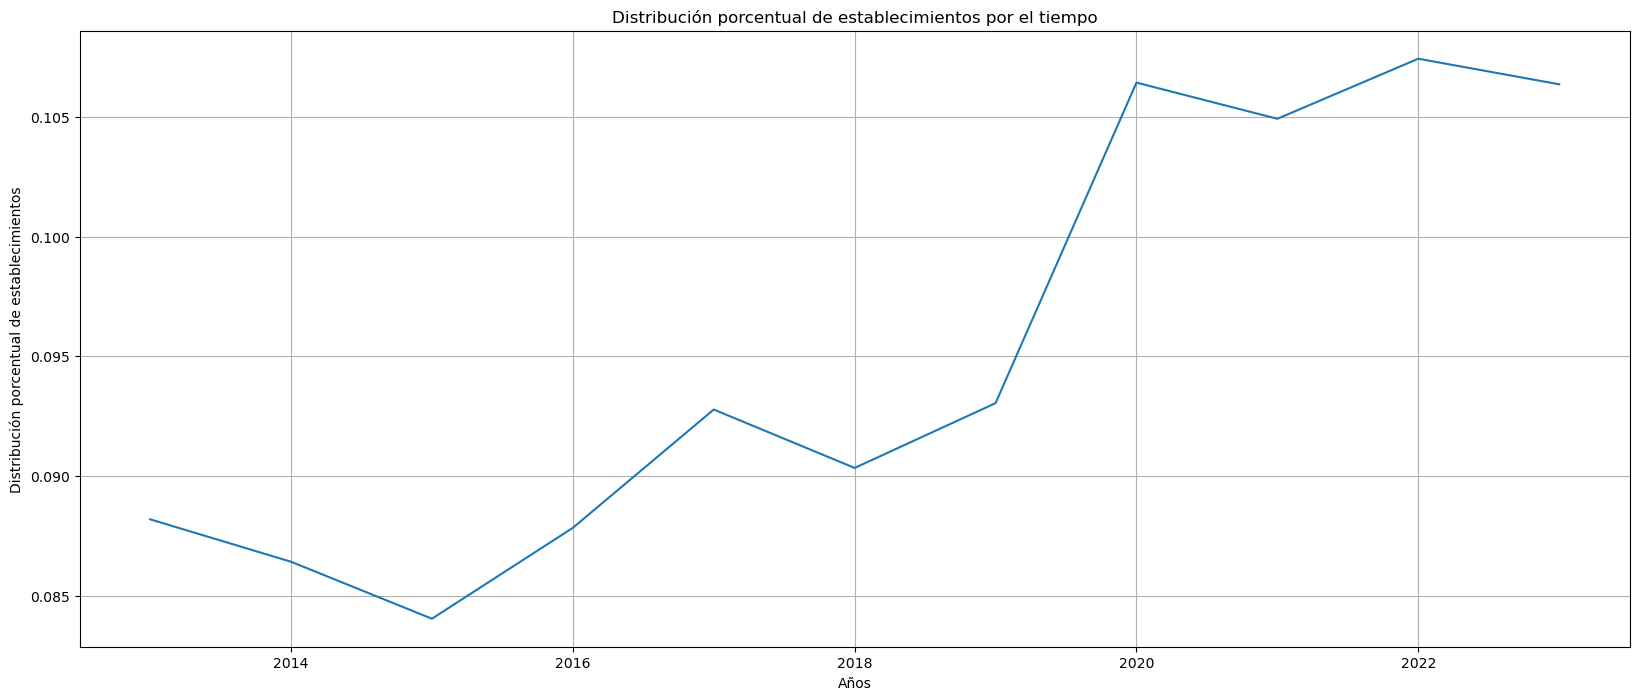

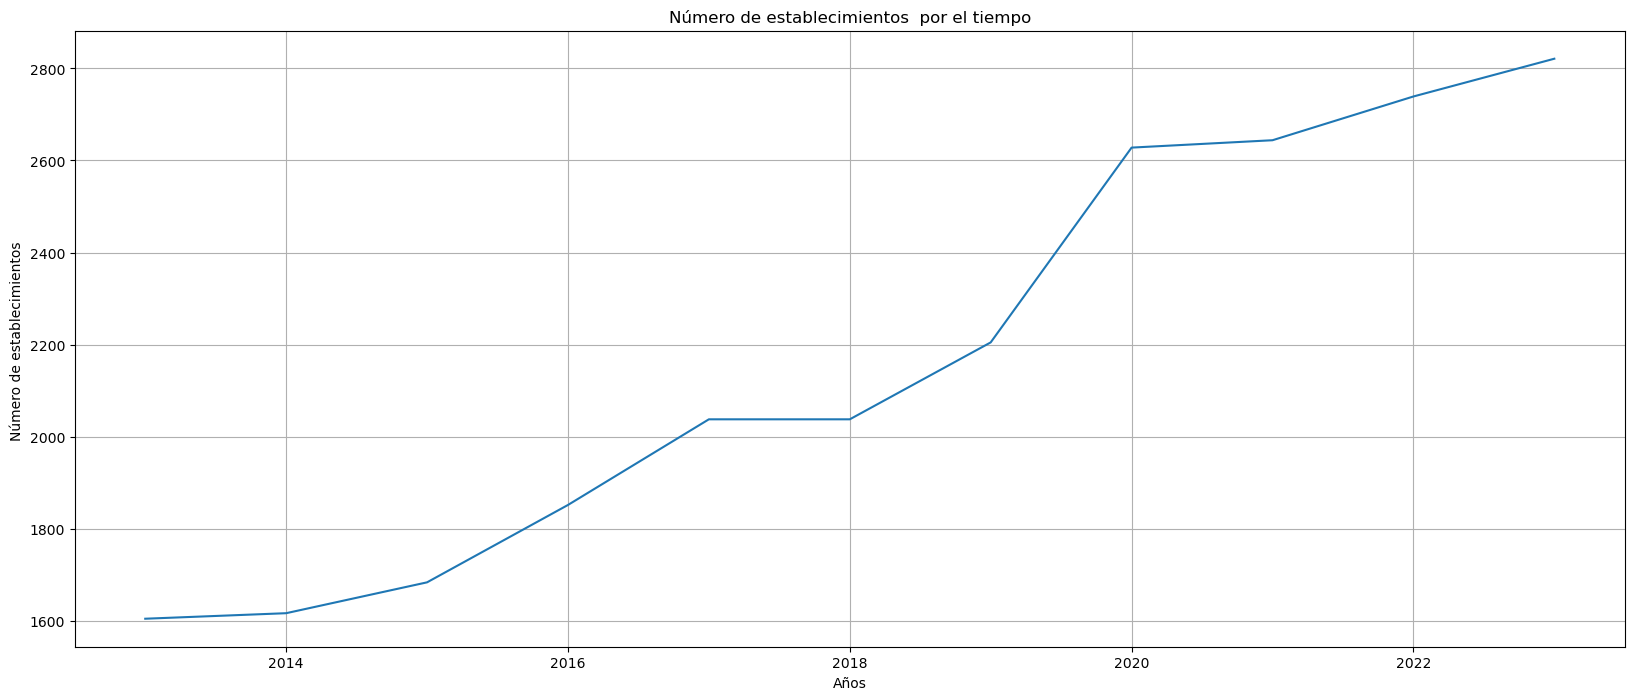

In [94]:
for name in df_establecimientos.columns:
    fig,ax = plt.subplots(1,1,figsize=(20,8))

    sns.lineplot(x=df_establecimientos.index, y=df_establecimientos[name], ax=ax)
    plt.grid(True)
    ax.set_title(f'{name} por el tiempo')
    ax.set_xlabel('Años')
    ax.set_ylabel(f'{name}')

### Establecimientos crecimiento

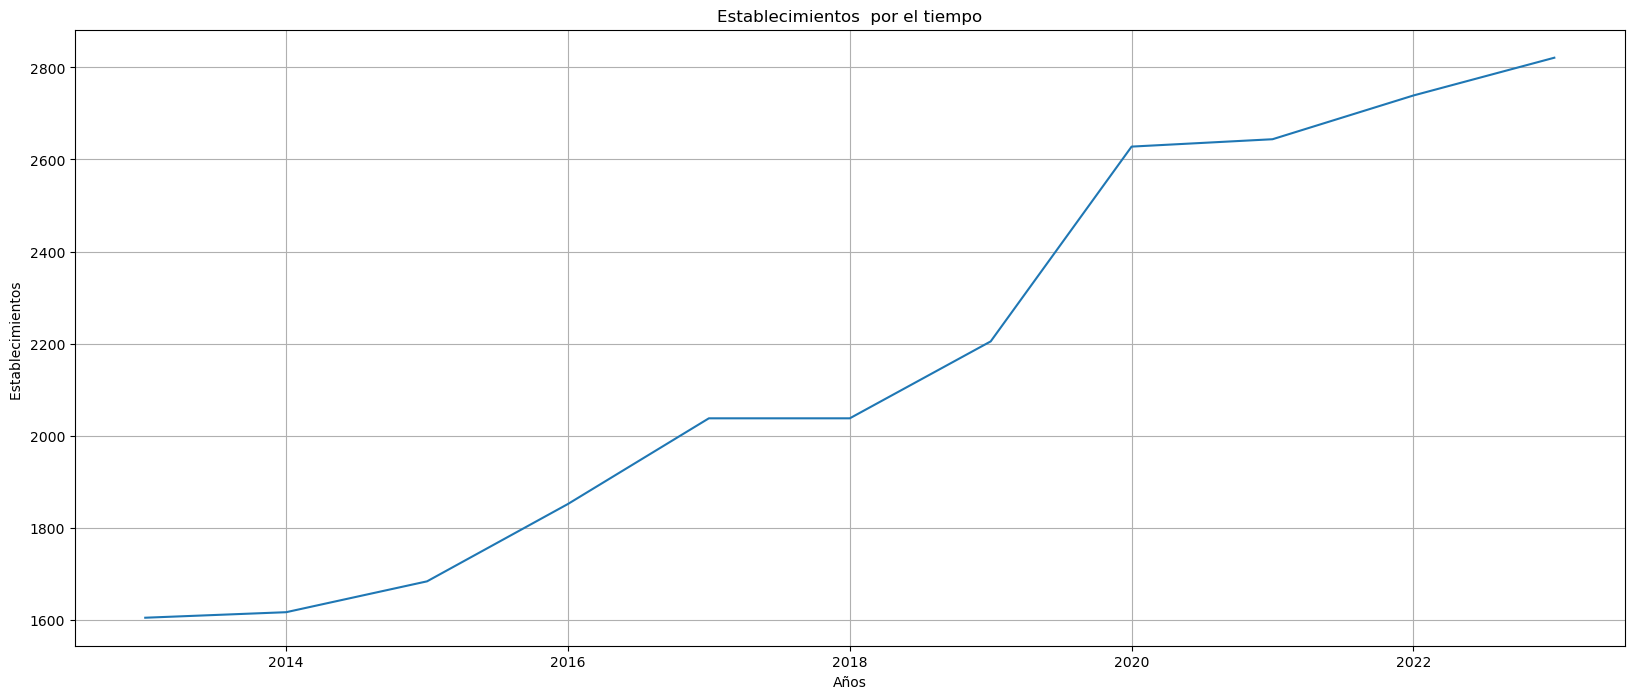

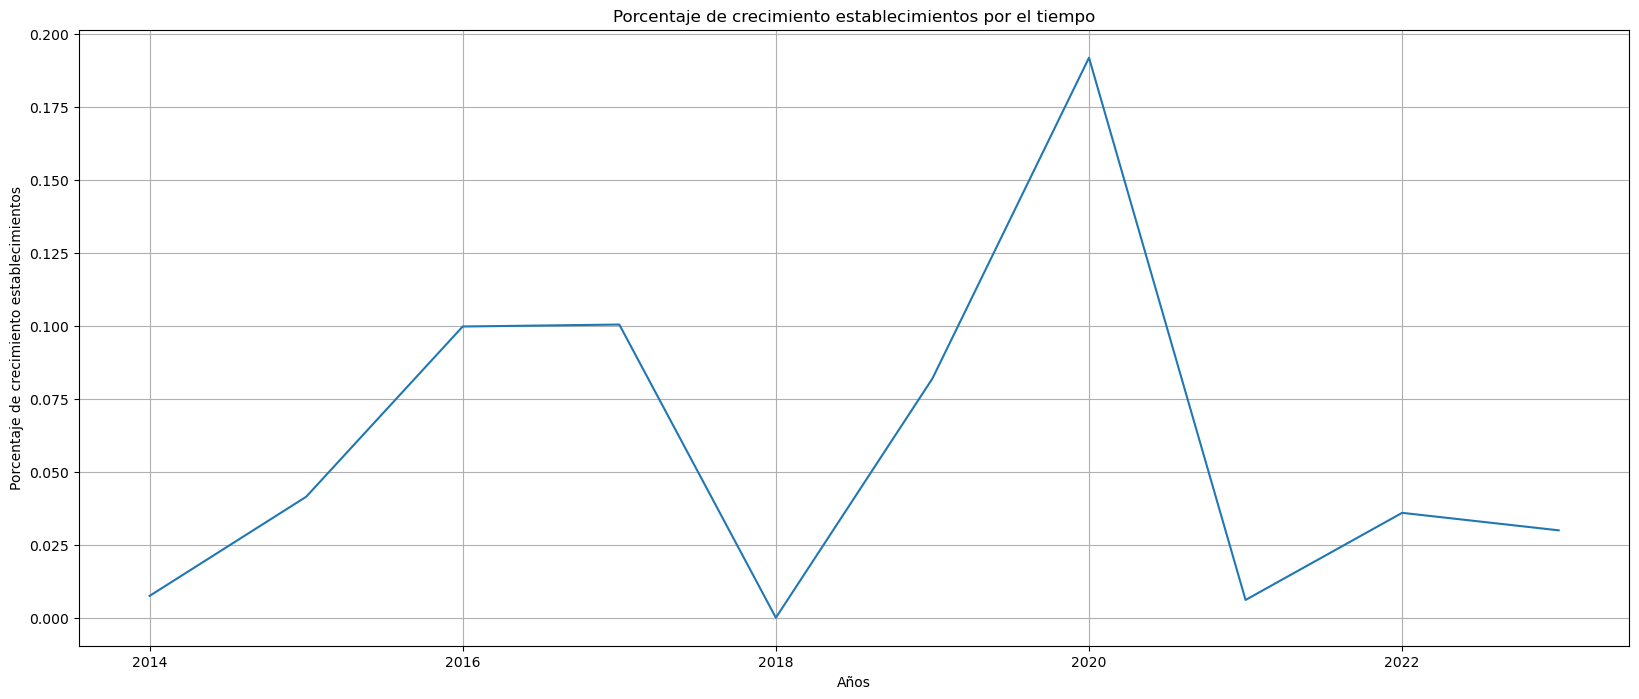

In [97]:
for name in df_establecimientos_crecimiento.columns:
    fig,ax = plt.subplots(1,1,figsize=(20,8))

    sns.lineplot(x=df_establecimientos_crecimiento.index, y=df_establecimientos_crecimiento[name], ax=ax)
    plt.grid(True)
    ax.set_title(f'{name} por el tiempo')
    ax.set_xlabel('Años')
    ax.set_ylabel(f'{name}')